# FEDS debugging system

## Fire_Forward in FireMain.py 

In [1]:
import ycpy
ycpy.util.nowarn()

In [2]:
import FireObj
import FireIO
import FireConsts
import FireMain
import FireFuncs
import FireTime
import FireGpkg_sfs

In [3]:
import importlib
importlib.reload(FireIO)
importlib.reload(FireMain)
importlib.reload(FireObj)
importlib.reload(FireConsts)
importlib.reload(FireGpkg_sfs)

<module 'FireGpkg_sfs' from '/Users/yangchen/GoogleDrive/My/My.Research/UCI/ProjectsFull/California.fire/Code/fireatlas/FireGpkg_sfs.py'>

In [4]:
import os
import glob

In [5]:
import pandas as pd
import geopandas as gpd
from datetime import date
import time

In [93]:
t = [2020, 9, 16, 'PM']
regnm = 'Creek'

In [102]:
fperims_SNPP = FireIO.load_gpkgobj(t,'Creek',layer='perimeter')
flines_SNPP = FireIO.load_gpkgobj(t,'Creek',layer='fireline')
fnfps_SNPP = FireIO.load_gpkgobj(t,'Creek',layer='newfirepix')

In [103]:
fperims_NOAA20 = FireIO.load_gpkgobj(t,'CreekNOAA20',layer='perimeter')
flines_NOAA20 = FireIO.load_gpkgobj(t,'CreekNOAA20',layer='fireline')
fnfps_NOAA20 = FireIO.load_gpkgobj(t,'CreekNOAA20',layer='newfirepix')

In [109]:
fperims_VIIRS = FireIO.load_gpkgobj(t,'CreekVIIRS',layer='perimeter')
flines_VIIRS = FireIO.load_gpkgobj(t,'CreekVIIRS',layer='fireline')
fnfps_VIIRS = FireIO.load_gpkgobj(t,'CreekVIIRS',layer='newfirepix')

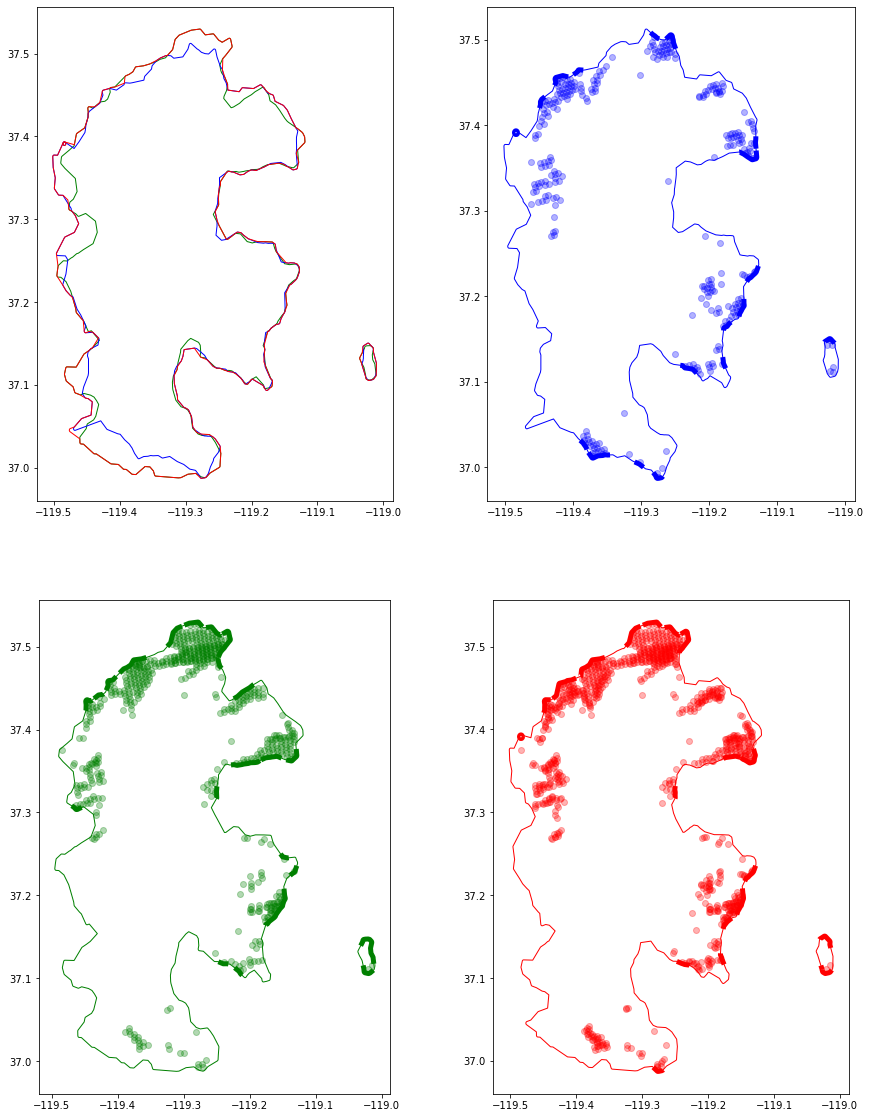

In [111]:
fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(15,20))
ax = axes[0][0]
fperims_SNPP.plot(facecolor='none',edgecolor='g',ax=ax)
_=fperims_NOAA20.plot(facecolor='none',edgecolor='b',ax=ax)
_=fperims_VIIRS.plot(facecolor='none',edgecolor='r',ax=ax)

ax = axes[1][0]
fperims_SNPP.plot(facecolor='none',edgecolor='g',ax=ax)
flines_SNPP.plot(color='g',ax=ax,lw=5)
fnfps_SNPP.plot(color='g',ax=ax,alpha=0.3)

ax = axes[0][1]
_=fperims_NOAA20.plot(facecolor='none',edgecolor='b',ax=ax)
flines_NOAA20.plot(color='b',ax=ax,lw=5)
fnfps_NOAA20.plot(color='b',ax=ax,alpha=0.3)

ax = axes[1][1]
_=fperims_VIIRS.plot(facecolor='none',edgecolor='r',ax=ax)
flines_VIIRS.plot(color='r',ax=ax,lw=5)
fnfps_VIIRS.plot(color='r',ax=ax,alpha=0.3)

In [118]:
sf_perim_SNPP = FireIO.load_gpkgsfs(t,0,'Creek',layer='perimeter')
sf_fline_SNPP = FireIO.load_gpkgsfs(t,0,'Creek',layer='fireline')
sf_nfp_SNPP = FireIO.load_gpkgsfs(t,0,'Creek',layer='newfirepix')
sf_nfplist_SNPP = FireIO.load_gpkgsfs(t,0,'Creek',layer='nfplist')

In [114]:
sf_perim_NOAA20 = FireIO.load_gpkgsfs(t,0,'CreekNOAA20',layer='perimeter')
sf_fline_NOAA20 = FireIO.load_gpkgsfs(t,0,'CreekNOAA20',layer='fireline')
sf_nfp_NOAA20 = FireIO.load_gpkgsfs(t,0,'CreekNOAA20',layer='newfirepix')
sf_nfplist_NOAA20 = FireIO.load_gpkgsfs(t,0,'CreekNOAA20',layer='nfplist')

In [115]:
sf_perim_VIIRS = FireIO.load_gpkgsfs(t,0,'CreekVIIRS',layer='perimeter')
sf_fline_VIIRS = FireIO.load_gpkgsfs(t,0,'CreekVIIRS',layer='fireline')
sf_nfp_VIIRS = FireIO.load_gpkgsfs(t,0,'CreekVIIRS',layer='newfirepix')
sf_nfplist_VIIRS = FireIO.load_gpkgsfs(t,0,'CreekVIIRS',layer='nfplist')

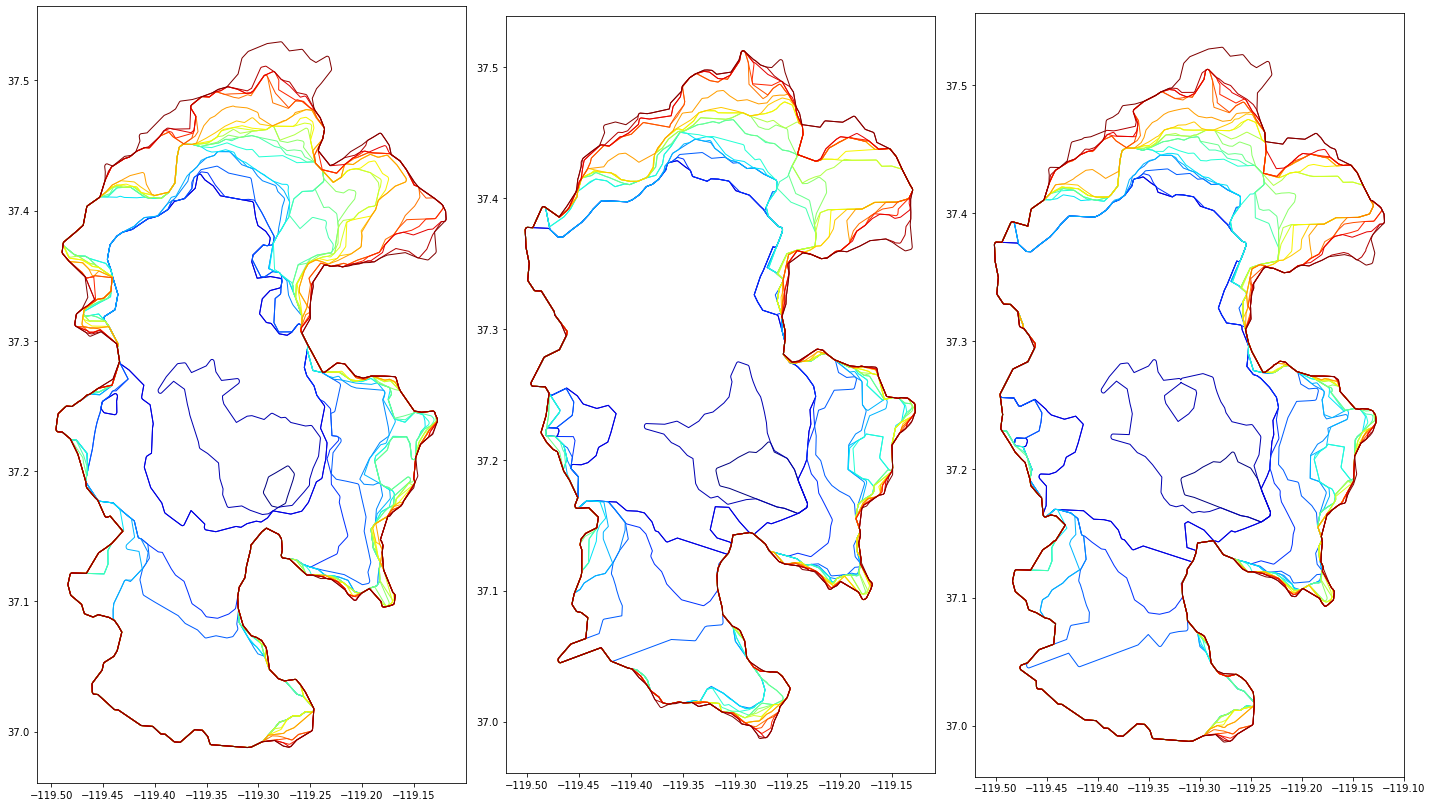

In [124]:
fig,axes=plt.subplots(ncols=3,figsize=(20,20))
ax = axes[0]
sf_perim_SNPP.plot(facecolor='none',edgecolor=pltcm.jet(sf_perim_SNPP.duration/sf_perim_SNPP.iloc[-1].duration),ax=ax)
# sf_fline_SNPP.plot(color='g',ax=ax,lw=5)
# sf_nfp_SNPP.plot(color='g',ax=ax,alpha=0.3)

ax = axes[1]
_=sf_perim_NOAA20.plot(facecolor='none',edgecolor=pltcm.jet(sf_perim_NOAA20.duration/sf_perim_NOAA20.iloc[-1].duration),ax=ax)
# sf_fline_NOAA20.plot(color='b',ax=ax,lw=5)
# sf_nfp_NOAA20.plot(color='b',ax=ax,alpha=0.3)

ax = axes[2]
_=sf_perim_VIIRS.plot(facecolor='none',edgecolor=pltcm.jet(sf_perim_VIIRS.duration/sf_perim_VIIRS.iloc[-1].duration),ax=ax)
# sf_fline_VIIRS.plot(color='r',ax=ax,lw=5)
# sf_nfp_VIIRS.plot(color='r',ax=ax,alpha=0.3)

_=plt.tight_layout()

In [127]:
sf_fline_SNPP['duration'] = (sf_fline_SNPP.t - sf_fline_SNPP.iloc[0].t).dt.components.days +   \
                            (sf_fline_SNPP.t - sf_fline_SNPP.iloc[0].t).dt.components.hours/24
sf_fline_NOAA20['duration'] = (sf_fline_NOAA20.t - sf_fline_NOAA20.iloc[0].t).dt.components.days +   \
                            (sf_fline_NOAA20.t - sf_fline_NOAA20.iloc[0].t).dt.components.hours/24
sf_fline_VIIRS['duration'] = (sf_fline_VIIRS.t - sf_fline_VIIRS.iloc[0].t).dt.components.days +   \
                            (sf_fline_VIIRS.t - sf_fline_VIIRS.iloc[0].t).dt.components.hours/24

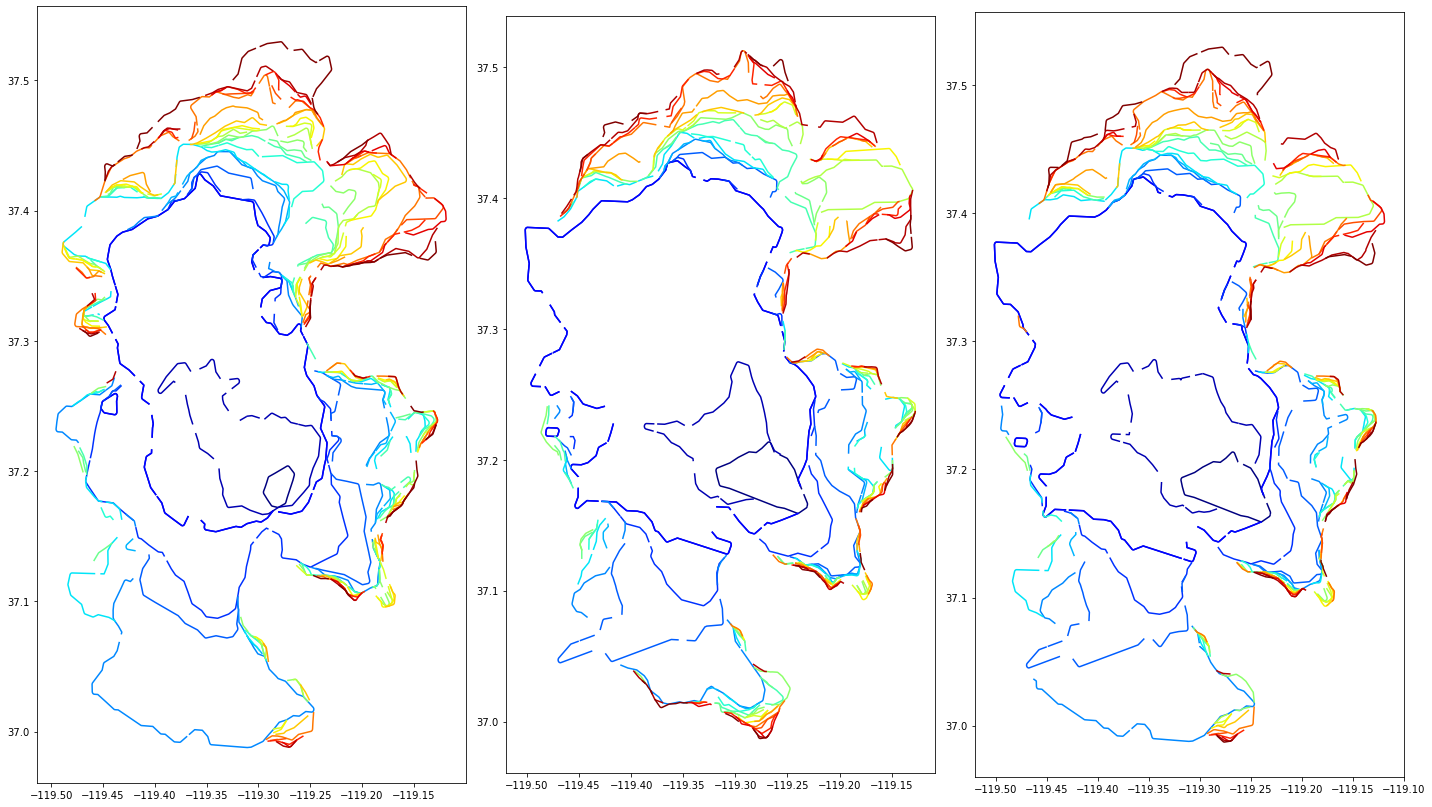

In [128]:
fig,axes=plt.subplots(ncols=3,figsize=(20,20))
ax = axes[0]
sf_fline_SNPP.plot(color=pltcm.jet(sf_fline_SNPP.duration/sf_perim_SNPP.iloc[-1].duration),ax=ax)
ax = axes[1]
sf_fline_NOAA20.plot(color=pltcm.jet(sf_fline_NOAA20.duration/sf_perim_SNPP.iloc[-1].duration),ax=ax)
ax = axes[2]
sf_fline_VIIRS.plot(color=pltcm.jet(sf_fline_VIIRS.duration/sf_perim_SNPP.iloc[-1].duration),ax=ax)

_=plt.tight_layout()

In [133]:
sf_nfp_SNPP['duration'] = (sf_nfp_SNPP.t - sf_nfp_SNPP.iloc[0].t).dt.components.days +   \
                            (sf_nfp_SNPP.t - sf_nfp_SNPP.iloc[0].t).dt.components.hours/24
sf_nfp_NOAA20['duration'] = (sf_nfp_NOAA20.t - sf_nfp_NOAA20.iloc[0].t).dt.components.days +   \
                            (sf_nfp_NOAA20.t - sf_nfp_NOAA20.iloc[0].t).dt.components.hours/24
sf_nfp_VIIRS['duration'] = (sf_nfp_VIIRS.t - sf_nfp_VIIRS.iloc[0].t).dt.components.days +   \
                            (sf_nfp_VIIRS.t - sf_nfp_VIIRS.iloc[0].t).dt.components.hours/24

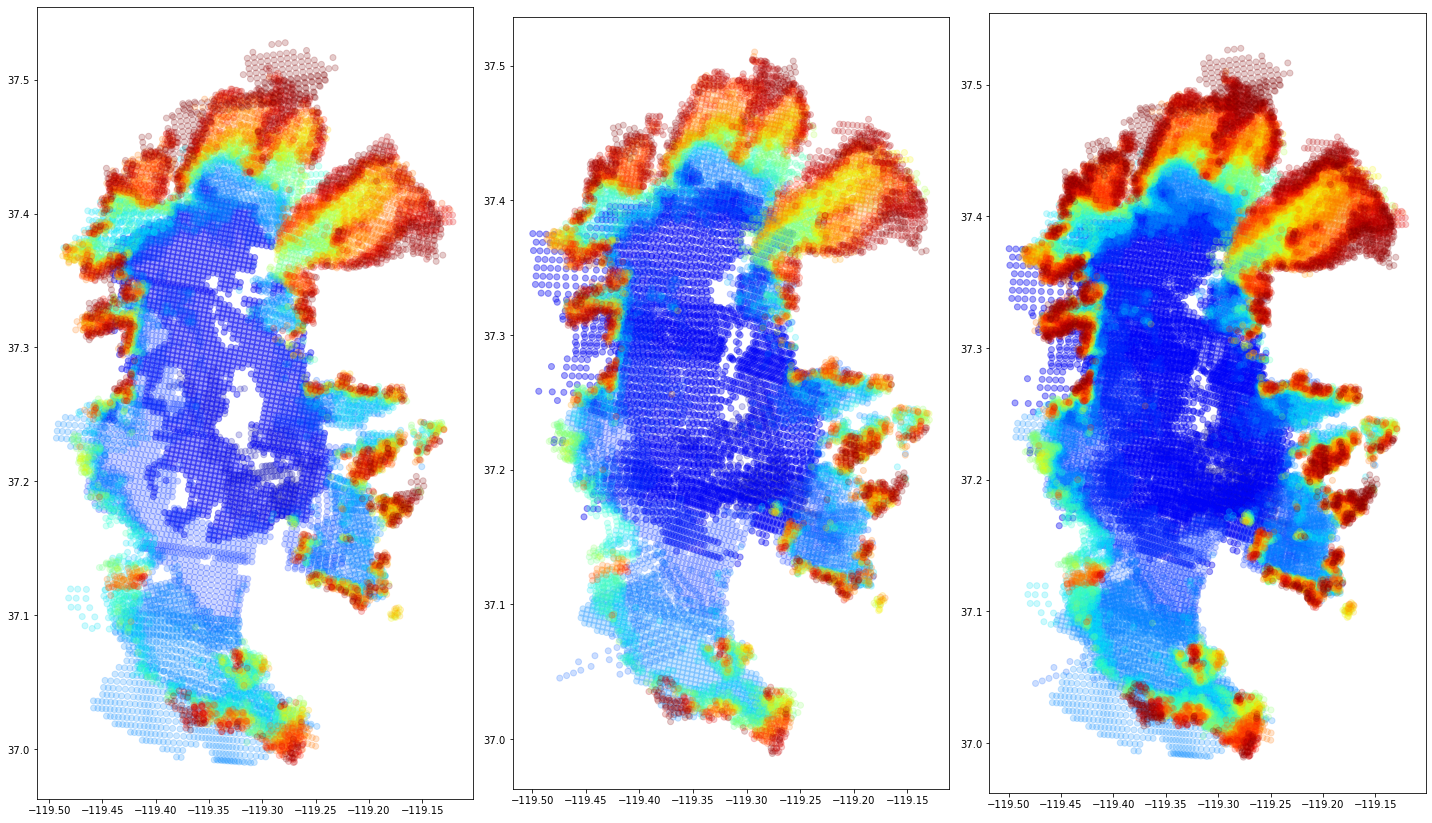

In [136]:
fig,axes=plt.subplots(ncols=3,figsize=(20,20))
ax = axes[0]
sf_nfp_SNPP.plot(color=pltcm.jet(sf_nfp_SNPP.duration/sf_perim_SNPP.iloc[-1].duration),ax=ax,alpha=0.2)
ax = axes[1]
sf_nfp_NOAA20.plot(color=pltcm.jet(sf_nfp_NOAA20.duration/sf_perim_SNPP.iloc[-1].duration),ax=ax,alpha=0.2)
ax = axes[2]
sf_nfp_VIIRS.plot(color=pltcm.jet(sf_nfp_VIIRS.duration/sf_perim_SNPP.iloc[-1].duration),ax=ax,alpha=0.2)

_=plt.tight_layout()

In [131]:
sf_dt = sf_nfplist_SNPP.datetime.astype('datetime64')-sf_nfplist_SNPP.datetime.astype('datetime64').iloc[0]
sf_nfplist_SNPP['duration'] = sf_dt.dt.components.days + sf_dt.dt.components.hours/24
sf_nfplist_SNPP.crs = 'epsg:4326'

In [132]:
sf_dt = sf_nfplist_NOAA20.datetime.astype('datetime64')-sf_nfplist_NOAA20.datetime.astype('datetime64').iloc[0]
sf_nfplist_NOAA20['duration'] = sf_dt.dt.components.days + sf_dt.dt.components.hours/24
sf_nfplist_NOAA20.crs = 'epsg:4326'

sf_dt = sf_nfplist_VIIRS.datetime.astype('datetime64')-sf_nfplist_VIIRS.datetime.astype('datetime64').iloc[0]
sf_nfplist_VIIRS['duration'] = sf_dt.dt.components.days + sf_dt.dt.components.hours/24
sf_nfplist_VIIRS.crs = 'epsg:4326'

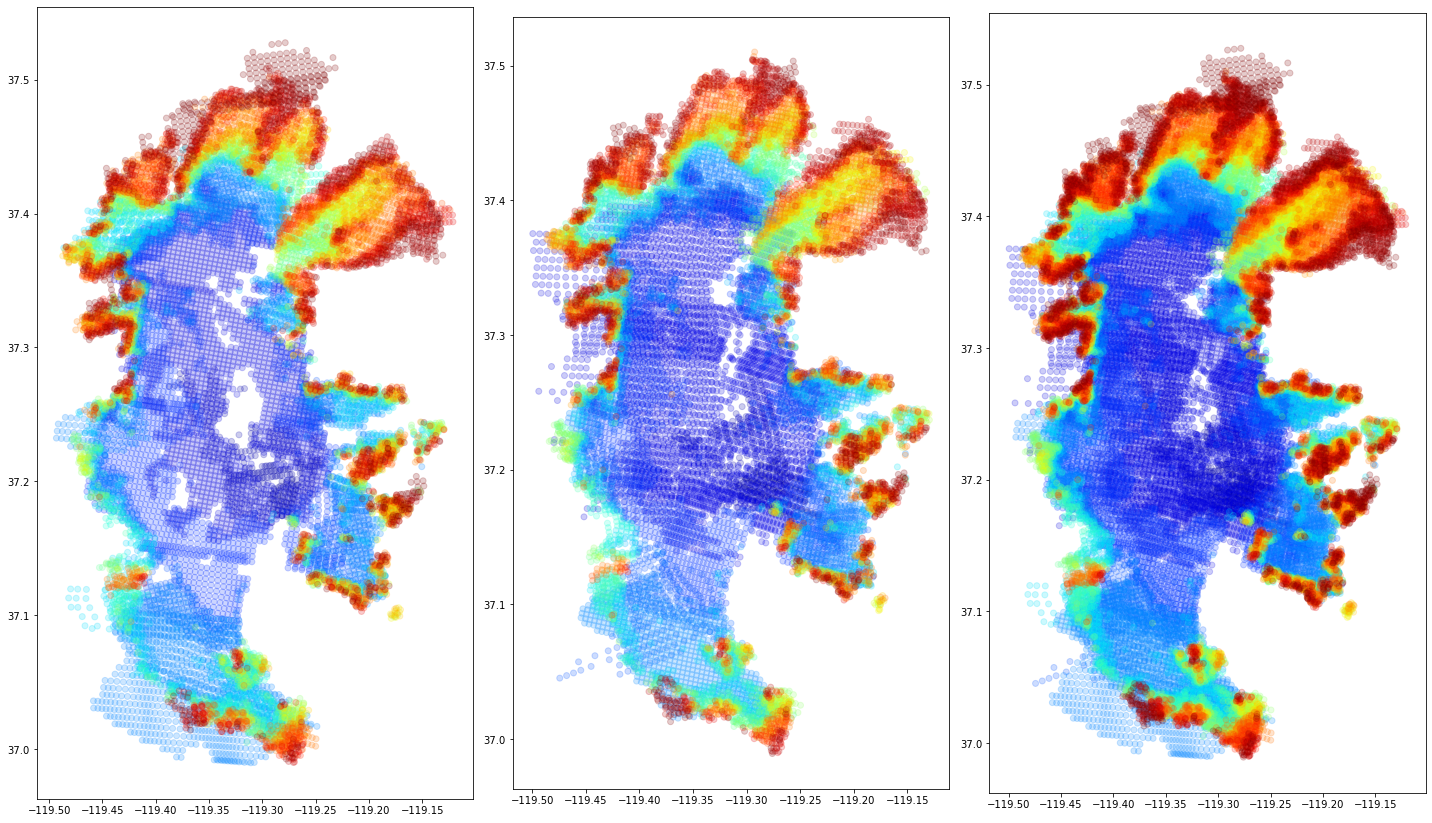

In [137]:
fig,axes=plt.subplots(ncols=3,figsize=(20,20))
ax = axes[0]
sf_nfplist_SNPP.plot(color=pltcm.jet(sf_nfplist_SNPP.duration/sf_perim_SNPP.iloc[-1].duration),ax=ax,alpha=0.2)
ax = axes[1]
sf_nfplist_NOAA20.plot(color=pltcm.jet(sf_nfplist_NOAA20.duration/sf_perim_SNPP.iloc[-1].duration),ax=ax,alpha=0.2)
ax = axes[2]
sf_nfplist_VIIRS.plot(color=pltcm.jet(sf_nfplist_VIIRS.duration/sf_perim_SNPP.iloc[-1].duration),ax=ax,alpha=0.2)

_=plt.tight_layout()